### Task 1


In [4]:
import pandas as pd

In [5]:
DATA_PATH = "project1_data.csv"

data = pd.read_csv(DATA_PATH, sep=";")

In [6]:
data

,id,weight,height,sex,cats,age,income,savings,single,place,expenses
0,1,84.99,171.72,1,2,55,1213.10,480.45,0,1,326.33
1,2,91.06,175.83,1,2,41,1300.14,192.14,0,2,409.24
2,3,88.30,175.34,1,1,42,1203.19,643.34,0,3,274.26
3,4,84.51,167.64,1,1,50,1231.13,303.35,0,1,374.86
4,5,85.72,171.62,1,2,53,892.02,424.99,0,2,248.24
...,...,...,...,...,...,...,...,...,...,...,...
445,446,86.48,168.03,1,1,59,6838.88,2875.71,1,3,-391.65
446,447,91.96,171.22,2,2,50,1447.32,511.32,0,3,368.74
447,448,85.15,174.71,1,1,52,1142.19,519.33,0,2,287.80
448,449,86.92,166.04,1,5,41,944.19,633.63,0,3,229.27


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        450 non-null    int64  
 1   weight    450 non-null    float64
 2   height    450 non-null    float64
 3   sex       450 non-null    int64  
 4   cats      450 non-null    int64  
 5   age       450 non-null    int64  
 6   income    450 non-null    float64
 7   savings   450 non-null    float64
 8   single    450 non-null    int64  
 9   place     450 non-null    int64  
 10  expenses  450 non-null    float64
dtypes: float64(5), int64(6)
memory usage: 38.8 KB


Some facts about the data:

- There are 450 observations in the sample
- There are 3 qualitative variables: sex, single, place
- There are 7 quantitative variables: weight, height, cats, age, income, savings, expenses
- There are no missing data, every observation has a non-null value for each variable
- One can argue that **id** is also a variable but as it's just an identifier without ANY additional information (as stated in the description) we will consider it irrelevant for the purpose of this project


#### Qualitative variables summary


In [8]:
pd.crosstab(data["sex"], data["single"], margins=True)

single,0,1,All
sex,,,
1,144,86,230
2,142,78,220
All,286,164,450


In [9]:
pd.crosstab(data["sex"], data["place"], margins=True)

place,1,2,3,All
sex,,,,
1,57,108,65,230
2,50,107,63,220
All,107,215,128,450


In [10]:
pd.crosstab(data["place"], data["single"], margins=True)

single,0,1,All
place,,,
1,74,33,107
2,130,85,215
3,82,46,128
All,286,164,450


In [11]:
qual_vars = ["sex", "single", "place"]
qual_data = data[qual_vars]

qual_data.mode(axis=0)

,sex,single,place
0,1,0,2


In [12]:
data["place"].median()

np.float64(2.0)

Key observations:

- Data is almost evenly distributed in terms of the respondent's **gender** (230 females, 220 males)
- Data isn't equally distributed in terms of the **household status**, i.e. we can notice an over-representation of people living in a multi-person household (286 observations) in comparison to the people living in a single-person household (164 observations)
- Similar thing can be observed for the **place** variable, i.e. there is an over-representation of people living in medium towns, from 10,000 to 100,000 inhabitants (215 observations). On the other hand, there are only 107 observations of people living in small towns, i.e. up to 10,000 inhabitants and 128 observations of people living in large towns, i.e. over 100,000 inhabitants


#### Quantitative variables summary


In [13]:
quan_vars = ["weight", "height", "cats", "age", "income", "savings", "expenses"]
quan_data = data[quan_vars]
desc = quan_data.describe()

desc

,weight,height,cats,age,income,savings,expenses
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,89.477667,177.277267,2.035556,50.613333,1592.097733,620.030667,308.810178
std,3.600803,7.918122,1.372195,6.847808,940.605357,415.998130,126.167312
min,77.890000,158.670000,0.000000,34.000000,691.730000,85.800000,-391.650000
25%,86.830000,170.755000,1.000000,46.000000,1051.787500,387.605000,236.567500
50%,89.420000,176.635000,2.000000,51.000000,1281.810000,560.415000,336.990000
75%,92.030000,183.935000,3.000000,55.000000,1799.727500,733.565000,407.227500
max,99.720000,195.790000,5.000000,73.000000,7089.020000,3200.920000,486.790000


In [14]:
quan_data[quan_data["expenses"] < 0]

,weight,height,cats,age,income,savings,expenses
267,93.74,167.67,5,41,6671.50,2769.05,-299.55
341,87.51,168.10,3,52,7089.02,3200.92,-325.31
425,91.21,184.93,2,45,6509.39,2602.49,-349.07
445,86.48,168.03,1,59,6838.88,2875.71,-391.65


We can observe that there are some errors in the **expenses** variables. The description of the dataset says about a possibility of negative savings values indicating that expenses were greater than the income of a respondent. There are no negative values for the savings variable (which by only itself could be possible) and there are negative values for the expenses variable (which doesn't make much sense as it's hard to even define a negative expense in this context). As we'd like to operate on a correct data, I decide to throw away the 4 observations with incorrect expenses value.


In [15]:
data = data[data["expenses"] >= 0]
quan_data = data[quan_vars]
desc = quan_data.describe()

desc

,weight,height,cats,age,income,savings,expenses
count,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000
mean,89.475359,177.322960,2.029148,50.625561,1545.594596,599.922937,314.641614
std,3.606364,7.908077,1.369508,6.846383,805.260926,358.597800,110.529266
min,77.890000,158.670000,0.000000,34.000000,691.730000,85.800000,7.300000
25%,86.830000,170.790000,1.000000,46.000000,1048.792500,384.090000,237.725000
50%,89.420000,176.675000,2.000000,51.000000,1277.130000,559.645000,337.805000
75%,92.030000,183.935000,3.000000,55.000000,1783.440000,729.785000,408.417500
max,99.720000,195.790000,5.000000,73.000000,6226.690000,3033.940000,486.790000


In [16]:
iqr = desc.loc["75%"] - desc.loc["25%"]

iqr

weight        5.2000
height       13.1450
cats          2.0000
age           9.0000
income      734.6475
savings     345.6950
expenses    170.6925
dtype: float64

Key observations:

- The **weight** variable seems to be evenly distributed around 89.5 kg with a quite small standard deviation (~3.6 kg)
- Number of **cats** also looks to be evenly distributed. Mean and median of this variable are almost equal, an average resident of the Byteland owns 2 cats. Range of this variable is from 0 to 5 cats, so there are no observations with 6 or more cats
- Values of the **height** and **age** variables are less concentrated around the mean value (which can be concluded looking at the standard deviation and interquartile range) but also evenly distributed
- Range of the **age** variable is from 34 to 73, which means that there are no observations for young habitants. It can restrict our possibilities of reasoning for the **whole** population of the Byteland
- The **income** variable is definitely unevenly distributed. Mean and median values differ significantly, and because mean is higher than median we can conclude that the distribution is right-skewed. We can also observe high std and iqr values.
- **Savings** and **expenses** variables have similar characteristics to the income variable (all the facts related to the uneven distribution). The savings variable's distribution is also right-skewed, but the expenses variable's distribution seems to be left-skewed


#### Variables' distributions


In [17]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats
import statsmodels.api as sm

In [18]:
def plot_histogram_with_normal(
    data: pd.Series, var_name: str, alt_name: str | None = None
):
    mean = data.mean()
    std = data.std()

    fig = px.histogram(
        data,
        x=var_name,
        histnorm="probability density",
        title=f"Histogram of {alt_name if alt_name is not None else var_name} variable vs Normal Distribution PDF",
    )

    x = np.linspace(data.min(), data.max())
    fig.add_trace(
        go.Scatter(
            x=x,
            y=stats.norm.pdf(x, loc=mean, scale=std),
            name="Normal distribution",
        )
    )

    fig.show()


for column in quan_vars:
    col_data = data[column]
    plot_histogram_with_normal(col_data, column)

#### Observations

- **Weight** and **age** variables seem to be normally distributed.
- We can clearly see that variables **income**, **savings** and **expenses** aren't normally distributed, which is also proved by the QQ plots below. However if for the savings variable, we only took into consideration values up to 1050, we probably could see distribution quite similar to the normal one
- Variable **height** also isn't ideally normally distributed. Its distribution rather looks like a bimodal distribution. These two different modes may be associated with the correlation of height with respondent's gender, but it needs to be verified further


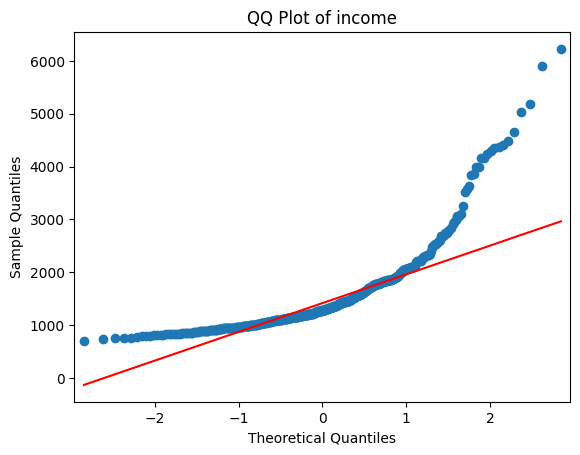

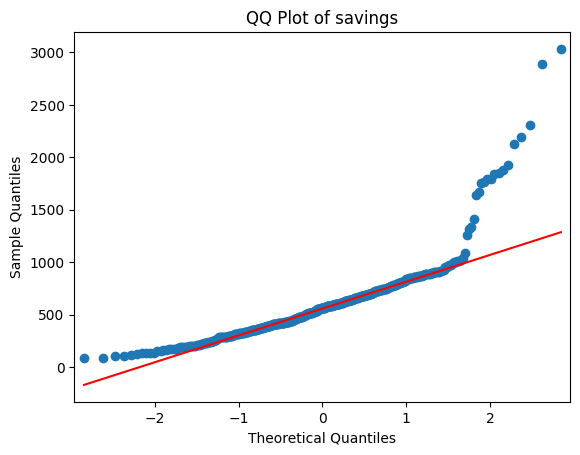

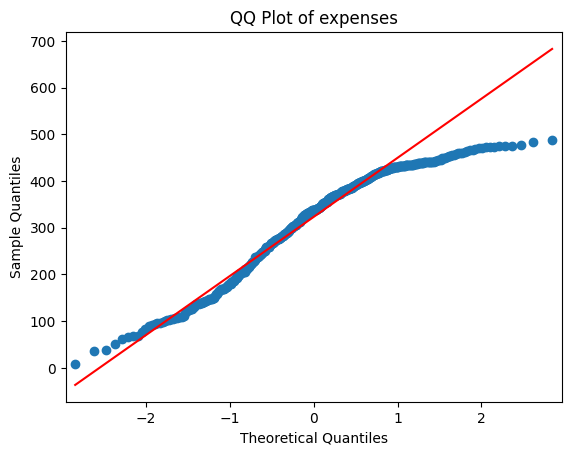

In [19]:
for col in ["income", "savings", "expenses"]:
    fig = sm.qqplot(data[col], line="q")
    plt.title(f"QQ Plot of {col}")
    plt.show()

QQ Plots also show that the mentioned variables aren't normally distributed. We can try to check if taking a logarithm of these values will make it better.


In [20]:
for col in ["income", "savings", "expenses"]:
    col_data = data[col]
    col_data = col_data[col_data >= 0]  # to ensure correct values for log
    col_data = np.log(col_data)

    fig = px.histogram(
        col_data,
        x=col,
        title=f"Histogram of log-{col} variable vs Normal Distribution PDF",
    )
    fig.show()

The situation got a **little** better for income and savings variables (however we can't say they're log-normally distributed) and didn't improve at all in the case of the expenses variable.


#### Task 2


Let's start by calculating Pearson's correlation coefficient for numerical variables.


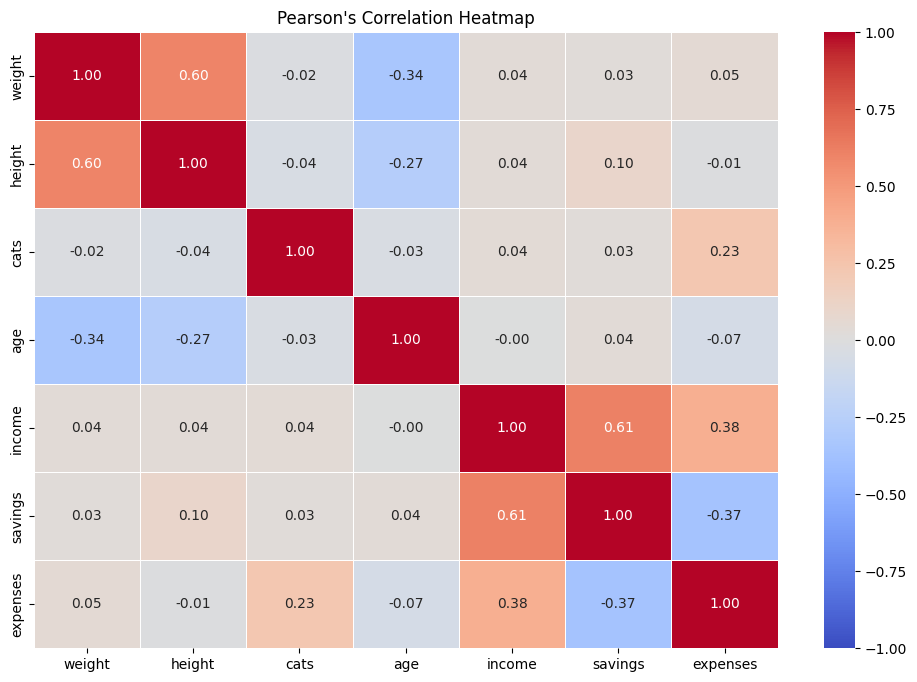

In [21]:
import seaborn as sns


def get_correlation_matrix(data: pd.DataFrame, method: str):
    pearson_corr = data.corr(method=method.lower())

    plt.figure(figsize=(12, 8))

    sns.heatmap(
        pearson_corr,
        annot=True,
        fmt=".2f",
        cmap="coolwarm",
        vmin=-1,
        vmax=1,
        linewidths=0.5,
    )

    plt.title(f"{method}'s Correlation Heatmap")
    plt.show()


data_corr = data[quan_vars]
get_correlation_matrix(data_corr, "Pearson")

We can notice positive Pearson's correlation between following pairs of variables: (width, height), (income, savings), (expenses, income) and (cats, expenses), however the last one seems to be weakly correlated (to be verified). There's also a negative Pearson's correlation between the following pairs: (savings, expenses), (age, weight) and (age, height). The problem with Pearson's correlation is that it only detects linear associations between numeric variables containing no outliers. We can remember from the Task 1 that e.g. the expenses variable originally contained some outliers that might cause errors here if we didn't get rid of them. It's worth remembering to be cautions while using this type of correlation coefficient.

Alternatively to the Pearson's correlation, we can use rank correlations, e.g. Spearman's or Kendall's correlation. Let's check it now.


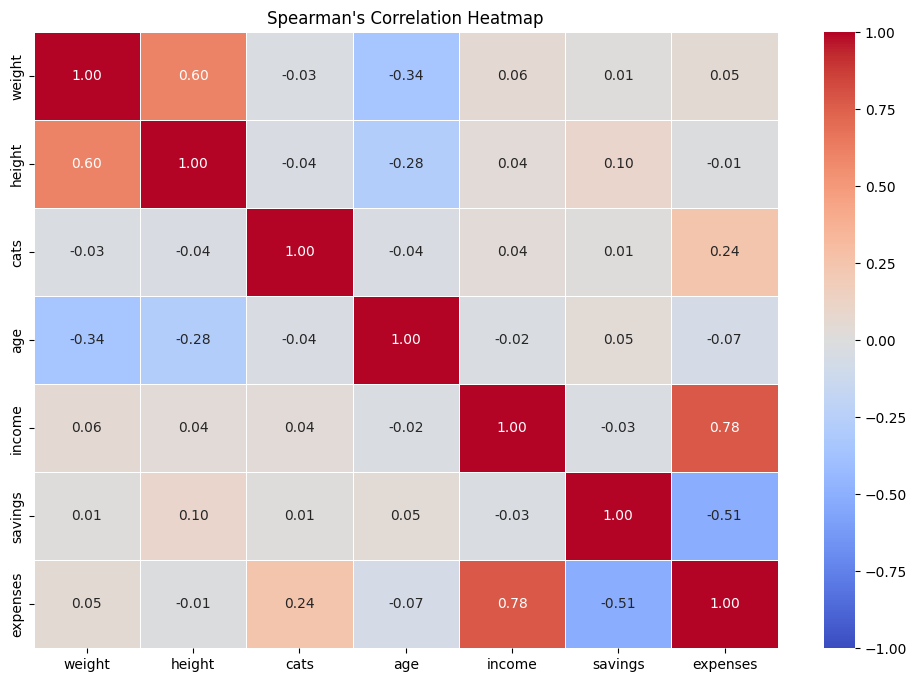

In [22]:
get_correlation_matrix(data_corr, "Spearman")

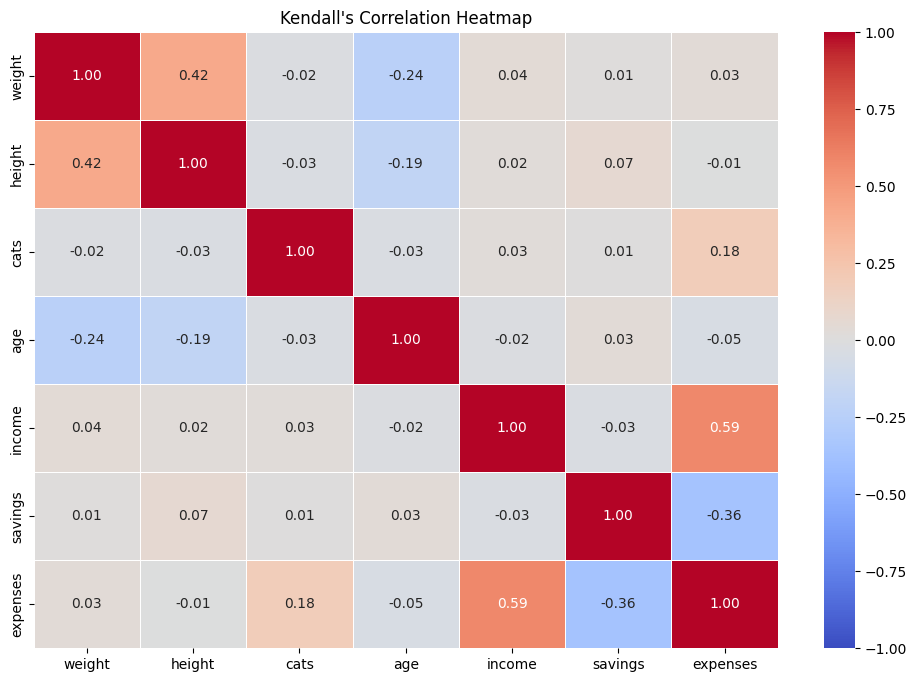

In [23]:
get_correlation_matrix(data_corr, "Kendall")

In the above experiments we lost the correlation between **savings** and **income** variables. The reason why this association appeared while testing Pearson's correlation may be the possbile occurence of outliers in both variables. We must remember that the Pearson's correlation is sensitive to outliers and even a few such values may impact our calculations. On the other hand rank correlations, such as Spearman's or Kendall's, are immune to outliers in data.

Let's now focus on the Spearman's correlation and check whether the found associations are in fact significant:


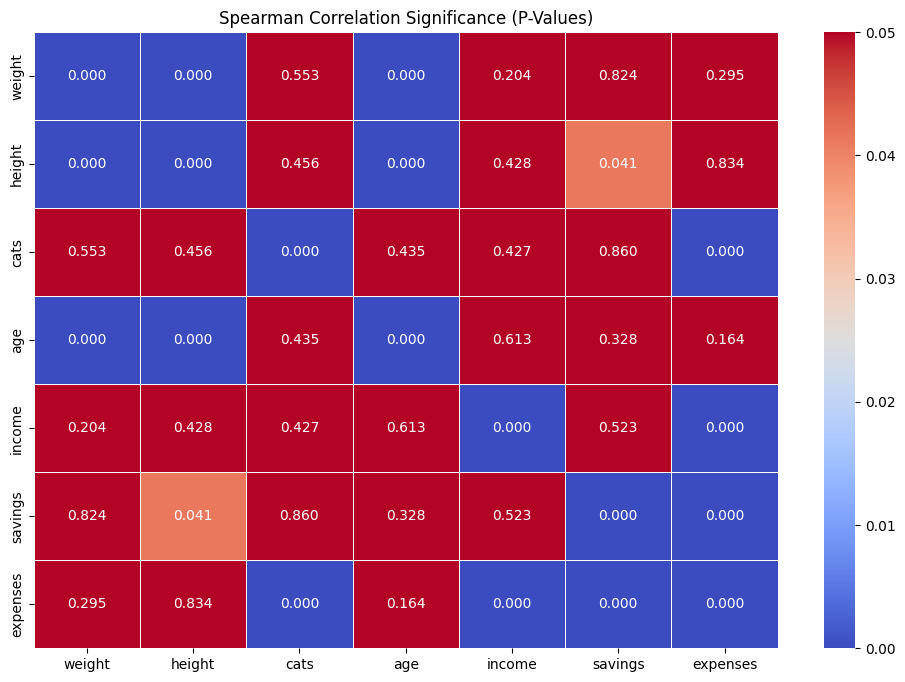

In [24]:
def test_spearman_significance(data: pd.DataFrame):
    p_values = pd.DataFrame(
        np.ones((data.shape[1], data.shape[1])),
        columns=data.columns,
        index=data.columns,
    )
    for col1 in data.columns:
        for col2 in data.columns:
            _, p_value = stats.spearmanr(data[col1], data[col2])
            p_values.loc[col1, col2] = p_value
    return p_values


spearman_p_values = test_spearman_significance(data_corr)

plt.figure(figsize=(12, 8))
sns.heatmap(
    spearman_p_values,
    annot=True,
    fmt=".3f",
    cmap="coolwarm",
    vmin=0,
    vmax=0.05,
    linewidths=0.5,
)
plt.title("Spearman Correlation Significance (P-Values)")
plt.show()

Assuming a significance level equal to 0.05 we can reject null hypothesis for all the cases we're interested in because of the p-value lower than 0.001 (and therefore lower than 0.05) in each such case. The null hypothesis in this test is that two tested samples have no ordinal correlation. It therefore provides us an evidence for a **significant** effect in each considered case.

The matrix computed above also reveals another interesting aspect, i.e. a significant correlation between the savings and height variables. We firstly didn't take it into consideration as the correlation coefficient was relatively small but it seems that it's worth to remember about this association as well.


Now let's perform some chi-squared independence tests to analyze associations for qualitative variables.


In [25]:
for var1 in qual_vars:
    for var2 in qual_vars:
        if var1 != var2:
            contingency_table = pd.crosstab(data[var1], data[var2])
            chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
            print(f"Chi-squared test between {var1} and {var2}:")
            print(f"p-value: {p}\n")

Chi-squared test between sex and single:
p-value: 0.7361265476126408

Chi-squared test between sex and place:
p-value: 0.8778313264710135

Chi-squared test between single and sex:
p-value: 0.7361265476126408

Chi-squared test between single and place:
p-value: 0.38402634701777644

Chi-squared test between place and sex:
p-value: 0.8778313264710135

Chi-squared test between place and single:
p-value: 0.38402634701777644



Assuming again significance level equal to 0.05 we can't reject the null hypothesis in any case. In this test null hypothesis tells that tested variables are independent. Thus we see that we have no indication that the tested variables are dependent.

We must also remember that this test is quite sensitive to the outliers, but it shouldn't be a problem in our case because we didn't find any outliers in the nominal variables.


### Task 3


Now let's summarize the data with different types of plots in order to try to spot even more relationships and draw more conclusions


a) Scatter plots for all quantitative variables against the expenses on food


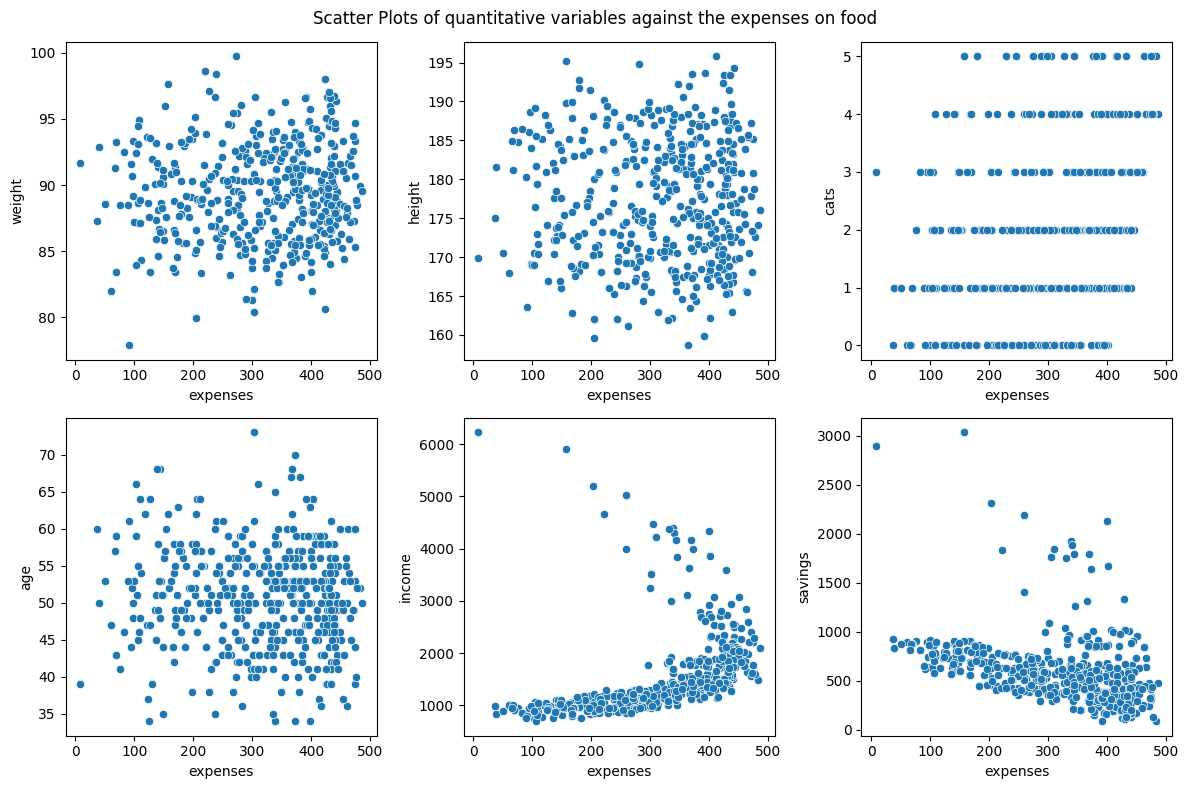

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

x = data["expenses"]

for i, var in enumerate(quan_vars):
    if var == "expenses":
        continue

    row = i // 3
    col = i % 3

    sns.scatterplot(x=x, y=data[var], ax=axes[row][col])

    axes[row][col].set_xlabel("expenses")
    axes[row][col].set_ylabel(var)

fig.suptitle("Scatter Plots of quantitative variables against the expenses on food")
fig.tight_layout()
plt.show()

#### Key observations

- **Weight**, **height** and **age** variables don't seem to be anyhow associated with expenses, we can observe clouds of points on the corresponding plots
- We can observe a minor positive correlation between the number of **cats** and the expenses. The expenses tend to be higher for respondents having more cats
- The **income** variable looks like it could be positively correlated with the expenses, although there are some interesting outliers from respondents with high income and low expenses that probably caused Spearman's and Kendall's correlation coefficients to indicate no significant correlation
- The **savings** variable seems to be negatively correlated with the expenses. There are also some outliers, but they're less interesting, i.e. there are people with low expenses and higher than expected savings
- All of the above observations align with the correlation analysis performed in the previous task


b) Boxplot for income in division by size of the town


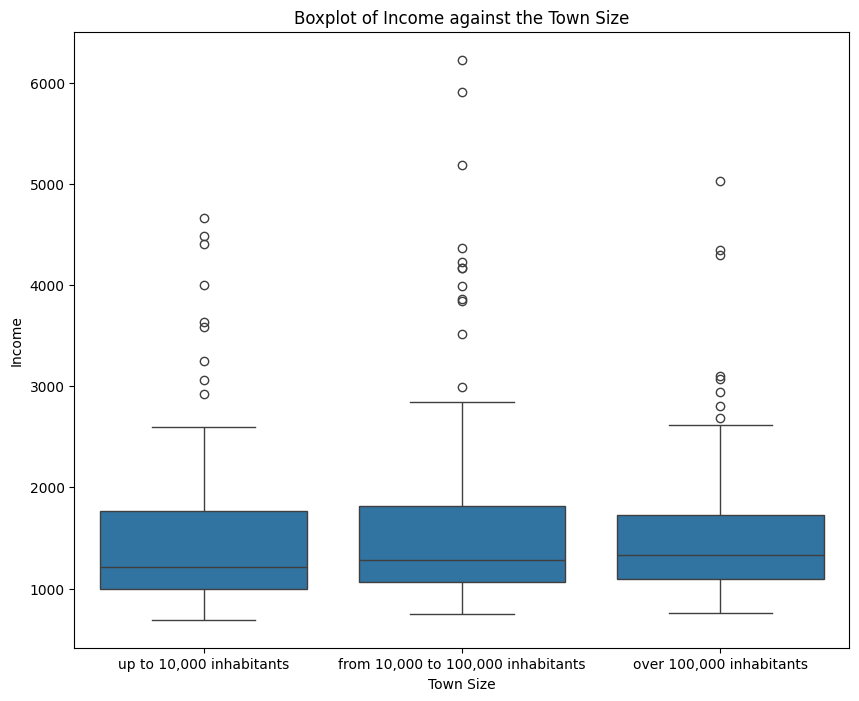

In [27]:
plt.figure(figsize=(10, 8))
plot = sns.boxplot(x=data["place"], y=data["income"])
plot.set_xticks([0, 1, 2])
plot.set_xticklabels(
    [
        "up to 10,000 inhabitants",
        "from 10,000 to 100,000 inhabitants",
        "over 100,000 inhabitants",
    ]
)
plt.title("Boxplot of Income against the Town Size")
plt.xlabel("Town Size")
plt.ylabel("Income")
plt.show()

We can observe something we could expect, i.e. mean income (indicated by a horizontal lines inside boxes) rises with the town size. It's also interesting to see that the income values vary less in a large towns than in medium and small towns. There are also many outliers indicating income values higher than expected. We could observe similar things while analyzing the histograms in the previous task.


c) Stacked bar chart for sex against whether the respondent is from single-person household


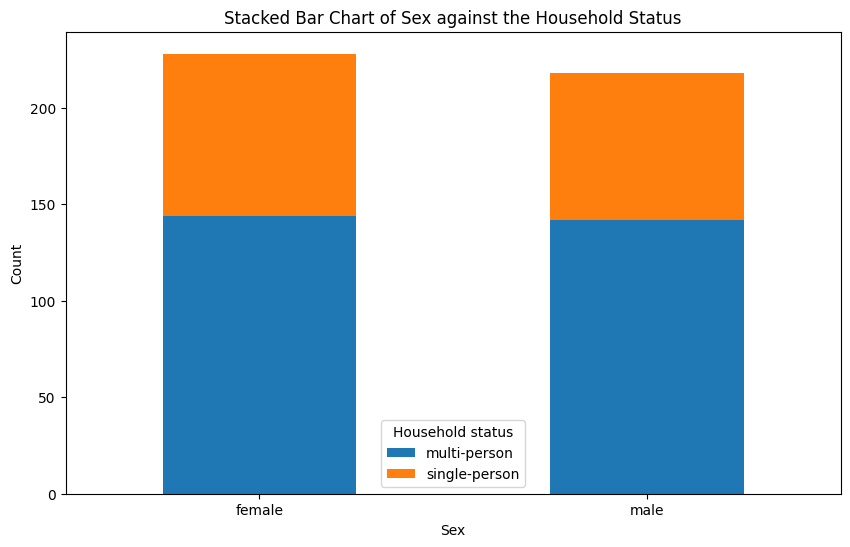

In [28]:
cross_tab = pd.crosstab(data["sex"], data["single"])
plot = cross_tab.plot(kind="bar", stacked=True, figsize=(10, 6))
plot.set_xticklabels(["female", "male"], rotation=0)
plt.title("Stacked Bar Chart of Sex against the Household Status")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(
    title="Household status",
    labels=["multi-person", "single-person"],
)
plt.show()

This plot shows that:

- there are more people living in multi-person households than in single-person ones
- data is almost equally distributed between genders, there are a few more women than men
- amounts of males and females living in multi-person households are almost equal, there is a little over-representation of females living in single-person households in comparison to males


d) (additional) Scatter plots of correlated pairs of variables


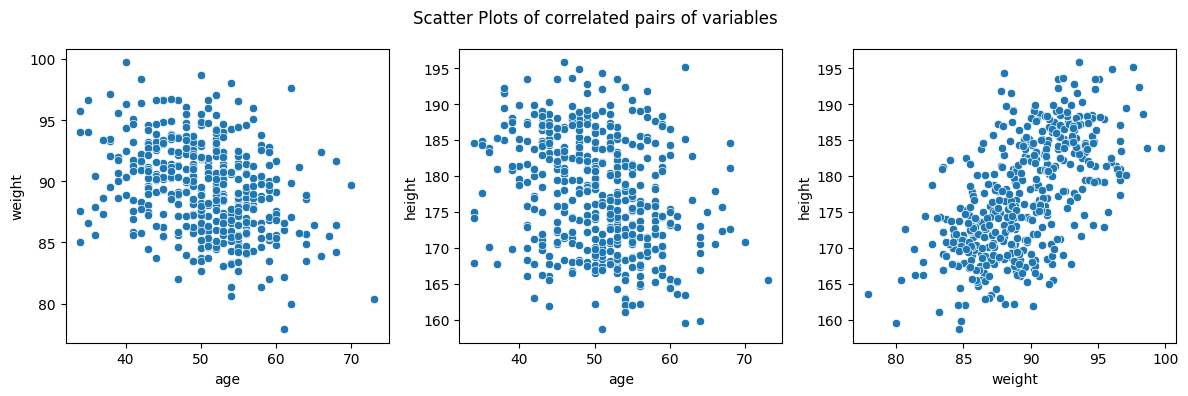

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

plots_dict = {
    0: ("age", "weight"),
    1: ("age", "height"),
    2: ("weight", "height"),
}

for col in plots_dict:
    x_var, y_var = plots_dict[col]

    sns.scatterplot(x=data[x_var], y=data[y_var], ax=axes[col])
    axes[col].set_xlabel(x_var)
    axes[col].set_ylabel(y_var)

fig.suptitle("Scatter Plots of correlated pairs of variables")
fig.tight_layout()
plt.show()

We can observe the associations between pairs of variables for which we detected significant correlation in the previous task. These plots visually prove facts obtained previously, i.e. there is a negative correlation between age and both weight and height variables. There is also a positive correlation between height and weight of respondents.


e) (additional) Boxplots of height and weight against sex


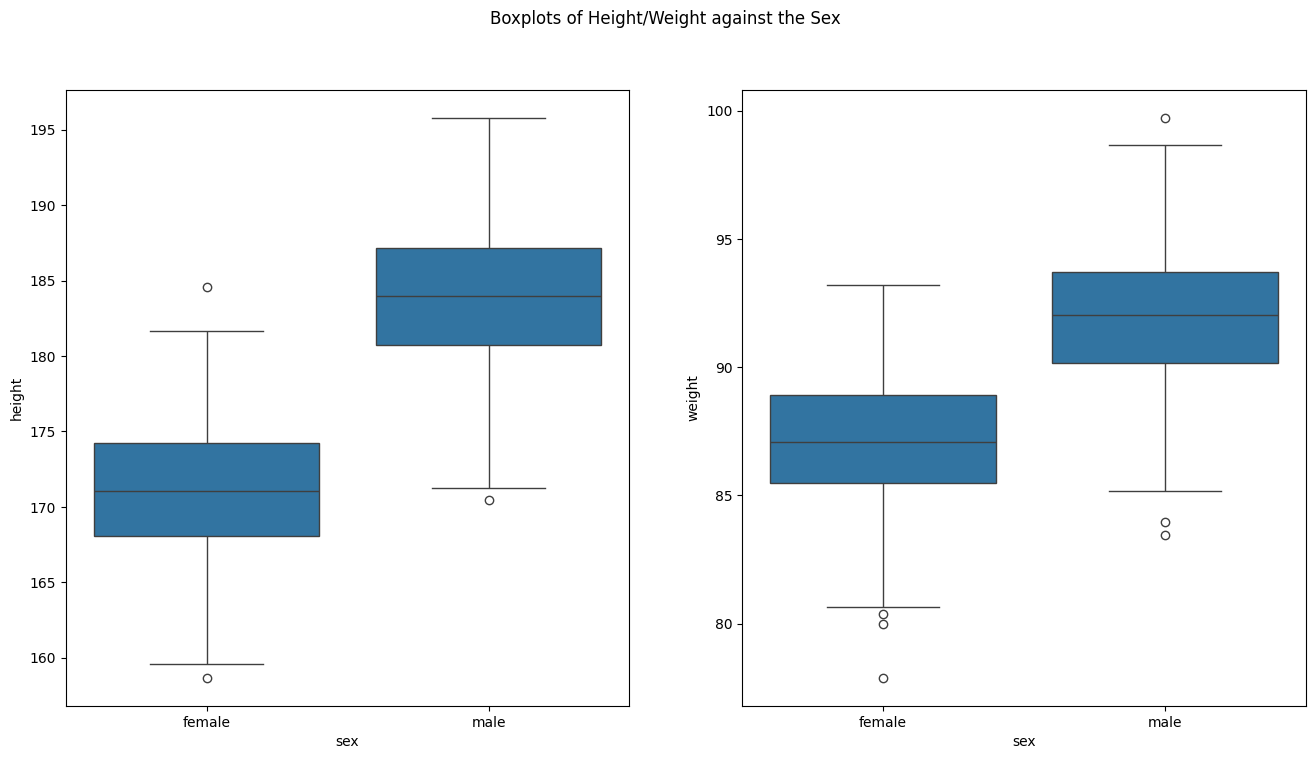

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

for i, var in enumerate(["height", "weight"]):
    plot = sns.boxplot(x=data["sex"], y=data[var], ax=axes[i])
    plot.set_xticks([0, 1])
    plot.set_xticklabels(["female", "male"])

    axes[i].set_xlabel("sex")
    axes[i].set_ylabel(var)

fig.suptitle("Boxplots of Height/Weight against the Sex")
plt.show()

Boxplots above visually prove that both height and weight variables depend on the sex of respondent, i.e. they're expected to be higher for males than for females. Height correlation is related to the bimodality of the distribution we observed in the first task. The interesting thing is that we didn't observe similar thing for weight variable, its distribution looks pretty much like a normal distribution. It shows that it's sometimes worth to look at the data from different perspectives. We can say that information about respondent's gender is somehow encoded in the height and weight variables and we need to remember about it in the further analysis.


f) (additional) Boxplot of income and expenses


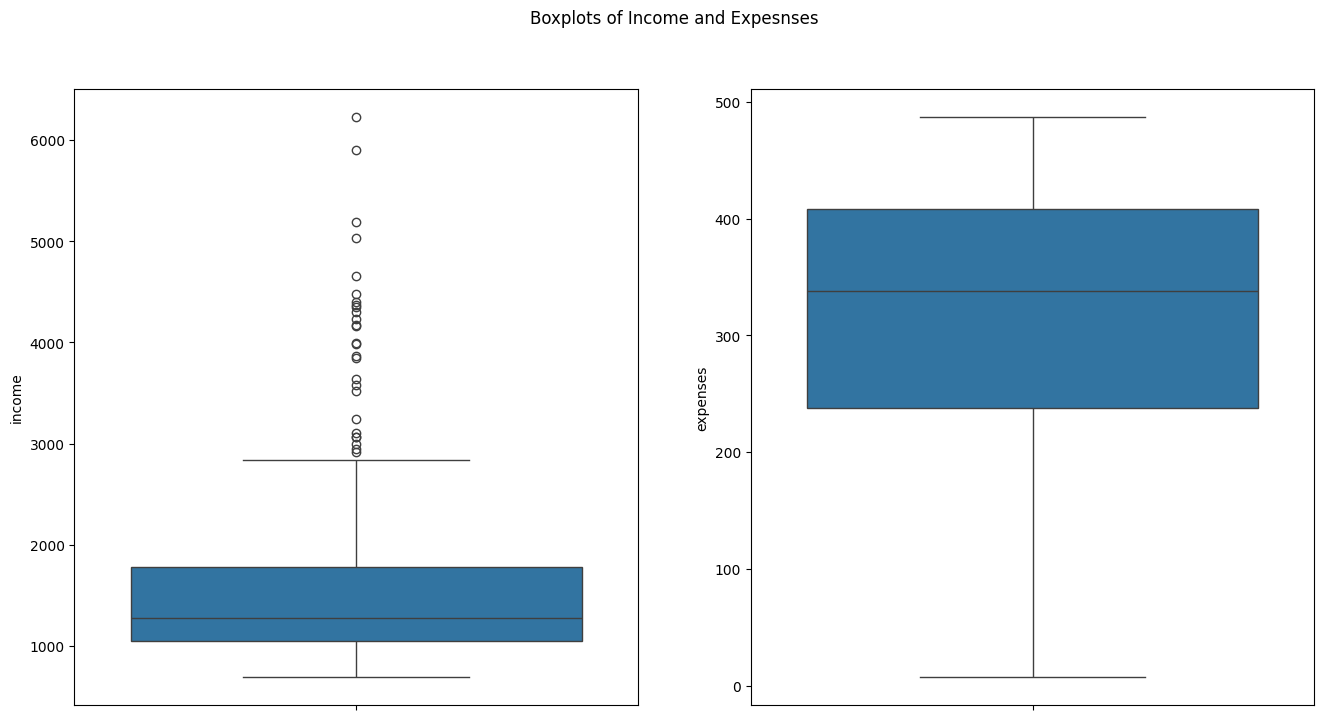

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

for i, var in enumerate(["income", "expenses"]):
    plot = sns.boxplot(y=data[var], ax=axes[i])
    axes[i].set_ylabel(var)

fig.suptitle("Boxplots of Income and Expesnses")
plt.show()

The goal of above boxplots was to check whether there are in fact outliers in the income or expenses variables, which could justify the differences between Pearson's and Spearman's/Kendall's correlation coefficients values. While there are no outliers visible for the expenses variable, we can clearly see many significant outliers in the income variable.


#### Task 4


Our next goal is to divide the Byteland's society into four wealth classes and compare the differences in expenses on food between them. Let's do it now!


/tmp/ipykernel_150241/3634252686.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



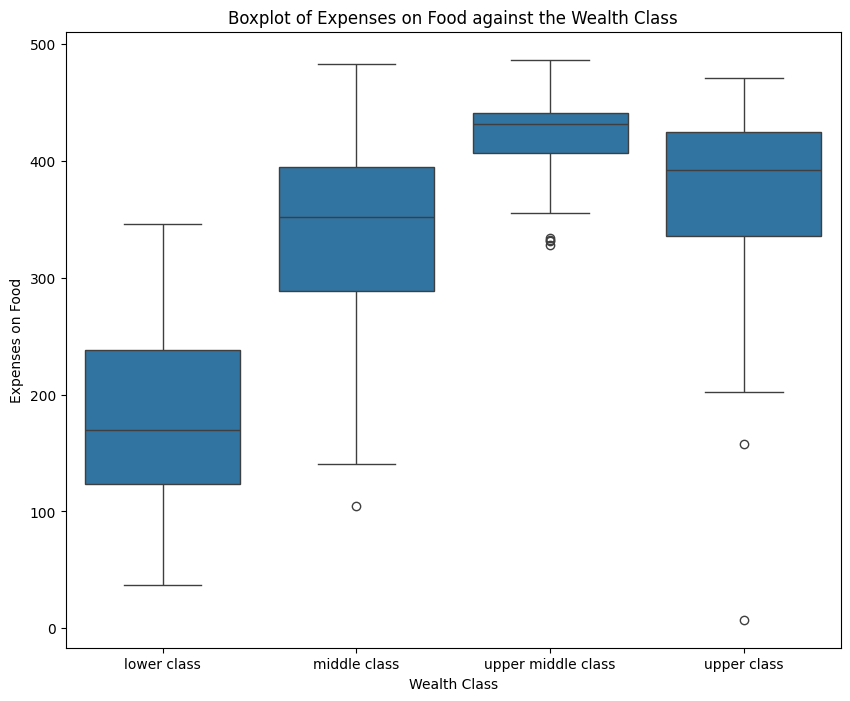

In [32]:
percentiles = np.percentile(data["income"], [25, 75, 90])
wealth_classes = ["lower class", "middle class", "upper middle class", "upper class"]


def wealth_class(income):
    if income < percentiles[0]:
        return "lower class"
    elif income < percentiles[1]:
        return "middle class"
    elif income < percentiles[2]:
        return "upper middle class"
    else:
        return "upper class"


data["wealth_class"] = data["income"].apply(wealth_class)

# first plot the calculated information as boxplots to gain some visual insight
plt.figure(figsize=(10, 8))
sns.boxplot(
    x=data["wealth_class"],
    y=data["expenses"],
    order=wealth_classes,
)
plt.title("Boxplot of Expenses on Food against the Wealth Class")
plt.xlabel("Wealth Class")
plt.ylabel("Expenses on Food")
plt.show()

As we can see, there are some outliers in our data so it may not be the best idea to choose standard deviation as a measure of variability (it can be especially unreliable for the upper class due to the significant outliers). Let's calculate interquantile range instead as it's a robust variability measure, immune to outliers.


In [33]:
expenses_iqr = (
    data.groupby("wealth_class")["expenses"]
    .apply(lambda x: x.quantile(0.75) - x.quantile(0.25))
    .reindex(wealth_classes)
)
print("Interquartile range of expenses on food by wealth class:")
print(expenses_iqr)

Interquartile range of expenses on food by wealth class:
wealth_class
lower class           114.5525
middle class          106.5750
upper middle class     34.5500
upper class            89.6600
Name: expenses, dtype: float64


Out of curiosity we can compare it with the standard deviation, just to confirm our beliefs :)


In [34]:
expenses_std = data.groupby("wealth_class")["expenses"].std().reindex(wealth_classes)
print("Standard deviation of expenses on food by wealth class:")
print(expenses_std)

Standard deviation of expenses on food by wealth class:
wealth_class
lower class           73.058353
middle class          78.711063
upper middle class    35.302295
upper class           90.626161
Name: expenses, dtype: float64


As we can see, there's a significant overhead caused by the outliers, especially in case of the upper middle and upper classes. The IQR seems to be a much better measure of variability in our case.


Key observations:

- Data presented on boxplots alligns with the facts discovered earlier
- Level of expenses rises with the income (here represented as a wealth class) until a certain level, i.e. an upper middle class, then it decreases for the upper class. It is connected with the Pearson's correlation detected for this pair of variables and the association between them visualized in the third task - first it increases linearly and then the trend collapses
- Measured variability also corresponds to the mentioned scatter plot. We can indeed observe that for quite rich respondents (upper middle class) the expenses are the highest and they're much more concentrated than for the other classes. There are also visible outliers that can significantly influence variability of the upper class if not omitted (that's why IQR is more suitable than STD in this case), but even if we drop them, the variability stays high. Expenses for the lower and middle classes vary the most, and this variability is of a similar magnitude in both classes


#### Task 5


Not let's try to answer some research questions using statistical tests.


a) Do women declare higher savings than men?


We'd like to use the unpaired two-sample t-test as we've got two samples and they're obviously not paired. There are two important assumptions that need to be checked:

1. The savings data for men and women are independent
2. The savings data is normally distributed or the sample size is large enough to apply the Central Limit Theorem

As the first assumption is fullfiled by the design of the study, we need to check the second one:


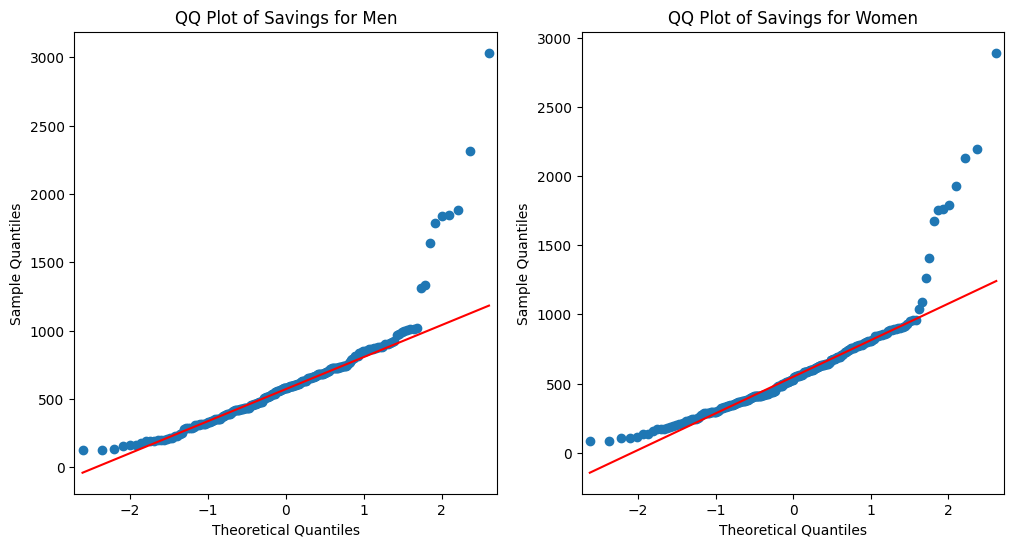

In [46]:
savings_women = data[data["sex"] == 1]["savings"]
savings_men = data[data["sex"] == 2]["savings"]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sm.qqplot(savings_men, line="q", ax=axes[0])
sm.qqplot(savings_women, line="q", ax=axes[1])

axes[0].set_title("QQ Plot of Savings for Men")
axes[1].set_title("QQ Plot of Savings for Women")

plt.show()

If we don't look at the outliers, values of savings seem to be normally distributed. Our samples are also pretty big (over 200 observations per sample) so in case of any doubts, CLT should solve our problems :)


Let's now conduct the test with following hypotheses:

- Null hypothesis (H0): The mean savings of women is equal to the mean savings of men.
- Alternative hypothesis (H1): The mean savings of women is greater than the mean savings of men.


In [51]:
SIGNIFICANCE_LEVEL = 0.01

t_stat, p_value = stats.ttest_ind(savings_women, savings_men, alternative="greater")

print(f"t-statistic: {t_stat}, p-value: {p_value}")
print()

if p_value < SIGNIFICANCE_LEVEL:
    print("P-value is smaller than the assumed significance level")
    print("Rejected the null hypothesis: Women declare higher savings than men.")
else:
    print("P-value is greater than the assumed significance level")
    print(
        "Failed to reject the null hypothesis: No evidence that women declare higher savings than men."
    )

t-statistic: -0.8234740674477353, p-value: 0.7946597278003025

P-value is greater than the assumed significance level
Failed to reject the null hypothesis: No evidence that women declare higher savings than men.


b) Does lower proportion of food expenses to income correlate with higher savings?


We'd like to calculate the correlation coefficient and check its significance. We may consider e.g. Pearson's or Spearman's coefficient. For the Pearson's coefficient assumptions are similar as previously, i.e. both variables need to be drawn from independent normal distributions.

Let's check the normality of the Food Expenses to Income Ratio:


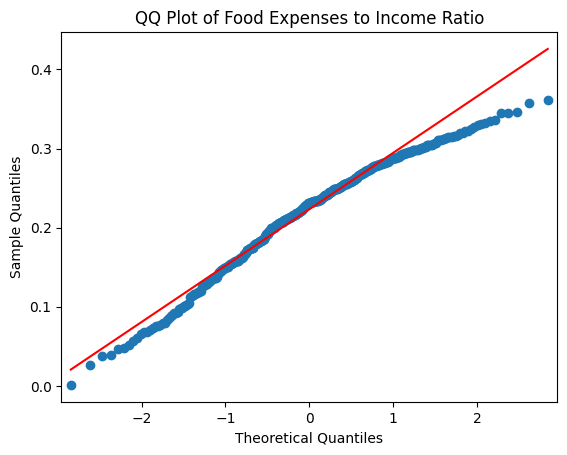

In [53]:
food_expense_ratio = data["expenses"] / data["income"]

sm.qqplot(food_expense_ratio, line="q")

plt.title("QQ Plot of Food Expenses to Income Ratio")
plt.show()

We can see that the variable isn't ideally normally distributed but as the sample size is high we can make use of the CLT.


Let's now calculate both Pearson's and Spearman's correlation coefficients and test the following hypotheses:

- Null hypothesis (H0): There is no correlation between the proportion of food expenses to income and savings.
- Alternative hypothesis (H1): There is a negative correlation between the proportion of food expenses to income and savings. (here we intuitively assume that if there's any significant correlation, it'll be a negative one)


In [63]:
print("### PEARSON'S CORRELATION COEFFICIENT ###")
print()

corr, p_value = stats.pearsonr(food_expense_ratio, data["savings"], alternative="less")

print(f"Correlation coefficient: {corr}, p-value: {p_value}")
print()

if p_value < SIGNIFICANCE_LEVEL:
    print("P-value is smaller than the assumed significance level")
    print(
        "Rejected the null hypothesis: There is a significant negative correlation between the proportion of food expenses to income and savings."
    )
else:
    print("P-value is greater than the assumed significance level")
    print(
        "Failed to reject the null hypothesis: No significant correlation between the proportion of food expenses to income and savings."
    )

### PEARSON'S CORRELATION COEFFICIENT ###

Correlation coefficient: -0.7355981261787874, p-value: 2.0415177738637808e-77

P-value is smaller than the assumed significance level
Rejected the null hypothesis: There is a significant negative correlation between the proportion of food expenses to income and savings.


In [65]:
print("### SPEARMAN'S CORRELATION COEFFICIENT ###")
print()

corr, p_value = stats.spearmanr(food_expense_ratio, data["savings"], alternative="less")

print(f"Correlation coefficient: {corr}, p-value: {p_value}")
print()

if p_value < SIGNIFICANCE_LEVEL:
    print("P-value is smaller than the assumed significance level")
    print(
        "Rejected the null hypothesis: There is a significant negative correlation between the proportion of food expenses to income and savings."
    )
else:
    print("P-value is greater than the assumed significance level")
    print(
        "Failed to reject the null hypothesis: No significant correlation between the proportion of food expenses to income and savings."
    )

### SPEARMAN'S CORRELATION COEFFICIENT ###

Correlation coefficient: -0.7517251267498376, p-value: 1.3325589806126974e-82

P-value is smaller than the assumed significance level
Rejected the null hypothesis: There is a significant negative correlation between the proportion of food expenses to income and savings.


Both coefficients indicate significant negative correlation between variables. Spearman's correlation is a little higher (in terms of absolute value) as it also includes all the potential non-linear dependencies between variables.


c) Is the mean weight of women greater than 56 kg?


We'd like to use the one-sample t-test. The weight of women needs to be normally distributed or the sample size needs to be large enough to satisfy CLT.

Let's check the normality:


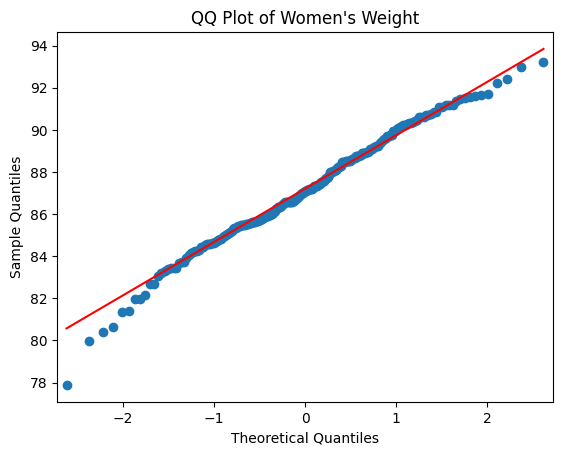

In [66]:
weight_women = data[data["sex"] == 1]["weight"]

sm.qqplot(weight_women, line="q")

plt.title("QQ Plot of Women's Weight")
plt.show()

The distribution looks good enough to perform the test (and we're also backed by the CLT as the sample is large).


Let's now conduct the test with following hypotheses:

- Null hypothesis (H0): The mean weight of women is equal to 56 kg.
- Alternative hypothesis (H1): The mean weight of women is greater than 56 kg.


In [68]:
t_stat, p_value = stats.ttest_1samp(weight_women, popmean=56, alternative="greater")

print(f"t-statistic: {t_stat}, p-value: {p_value}")
print()

if p_value < SIGNIFICANCE_LEVEL:
    print("P-value is smaller than the assumed significance level")
    print(
        "Rejected the null hypothesis: The mean weight of women is greater than 56 kg."
    )
else:
    print("P-value is greater than the assumed significance level")
    print(
        "Failed to reject the null hypothesis: No evidence that the mean weight of women is greater than 56 kg."
    )

t-statistic: 180.39754641727836, p-value: 2.1176805224740763e-247

P-value is smaller than the assumed significance level
Rejected the null hypothesis: The mean weight of women is greater than 56 kg.


d) Does variable **income** follow a Log-Normal distribution with the following parameters (shape=0.75, loc=650, scale=650)?


We'd like to use the Kolmogorov-Smirnov test. As the sample is really big, we can assume that the income variable is continuous (needed for this test).

Let's now conduct the test with following hypotheses:

- Null hypothesis (H0): The income data follows a Log-Norm distribution with the assumed parameters.
- Alternative hypothesis (H1): The income data does not follow a Log-Norm distribution with the assumed parameters.


In [ ]:
income_data = data["income"]
SHAPE, LOC, SCALE = 0.75, 650, 650

ks_stat, p_value = stats.kstest(income_data, "lognorm", args=(SHAPE, LOC, SCALE))

print(f"Kolmogorov-Smirnov test statistic: {ks_stat}, p-value: {p_value}")
print()

if p_value < SIGNIFICANCE_LEVEL:
    print(
        "Rejected the null hypothesis: The income data does not follow a Log-Norm distribution."
    )
else:
    print(
        "Failed to reject the null hypothesis: The income data follows a Log-Norm distribution."
    )

Kolmogorov-Smirnov test statistic: 0.03387859153321027, p-value: 0.6723662135646055

Failed to reject the null hypothesis: The income data follows a Log-Norm distribution.


We can also plot the income histogram with the Log-Normal curve over it (using the assumed parameters) to confirm our beliefs visually.


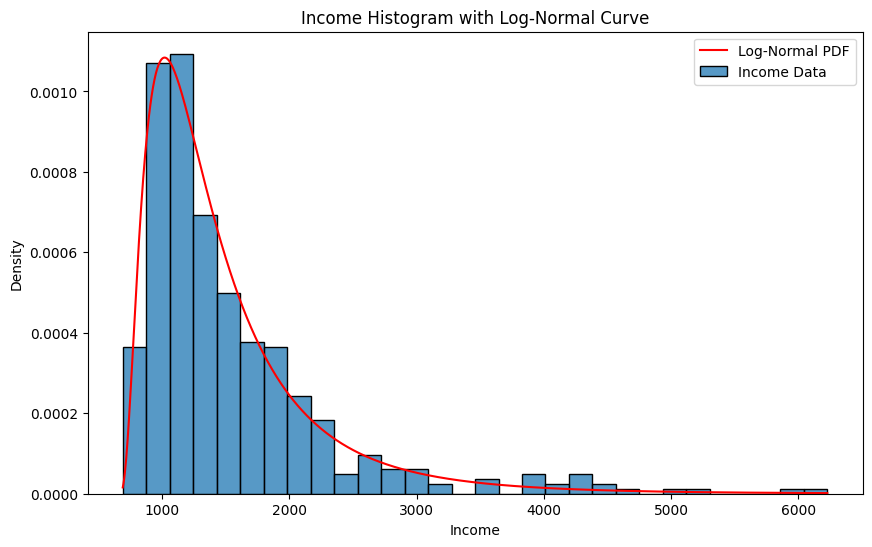

In [166]:
plt.figure(figsize=(10, 6))
sns.histplot(income_data, bins=30, kde=False, stat="density", label="Income Data")

x = np.linspace(min(income_data), max(income_data), 1000)

pdf = stats.lognorm.pdf(x, SHAPE, LOC, SCALE)
plt.plot(x, pdf, "r-", label="Log-Normal PDF")

# Add labels and legend
plt.title("Income Histogram with Log-Normal Curve")
plt.xlabel("Income")
plt.ylabel("Density")
plt.legend()

plt.show()